# Text Classification Evaluation

>This code evaluates different text classification models (SVM, Random Forest, Naive Bayes, Neural Network) using precision, recall, and F1 scores. It loads data from the previously scraped YouTube dataset and uses TF-IDF for feature extraction.

## Import Libraries and Load Data
> Import necessary libraries and load the YouTube dataset.

In [1]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV
data = pd.read_csv('youtube_data.csv')

## Preprocess Data
> Remove or impute missing descriptions.

In [2]:
# Remove or impute missing descriptions
data = data.dropna(subset=['Description'])

## Train-Test Split and Feature Extraction
> Split the data into training and testing sets and perform TF-IDF feature extraction.

In [3]:
# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_data['Description'])
X_test = tfidf_vectorizer.transform(test_data['Description'])

## Model Training and Evaluation
> Train models (SVM, Random Forest, Naive Bayes, Neural Network) and evaluate their performance.

In [4]:
# Model training and evaluation for SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, train_data['Category'])
svm_predictions = svm_model.predict(X_test)

# Model training and evaluation for Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, train_data['Category'])
rf_predictions = rf_model.predict(X_test)

# Model training and evaluation for Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, train_data['Category'])
nb_predictions = nb_model.predict(X_test)

# Model training and evaluation for Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model.fit(X_train, train_data['Category'])
nn_predictions = nn_model.predict(X_test)

## Display Evaluation Metrics
> Display precision, recall, and F1 scores along with confusion matrices.

SVM Precision: 0.90, Recall: 0.89, F1 Score: 0.89


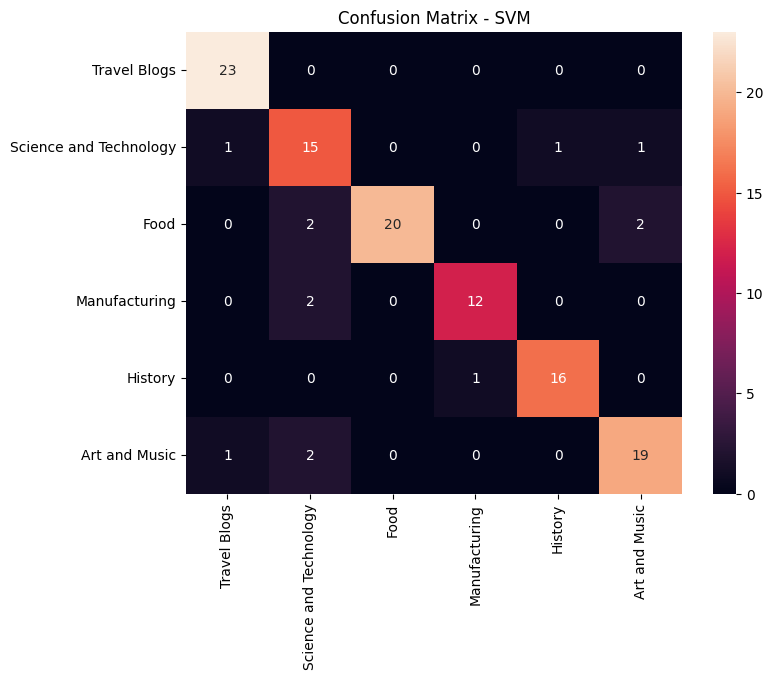

Random Forest Precision: 0.89, Recall: 0.89, F1 Score: 0.89


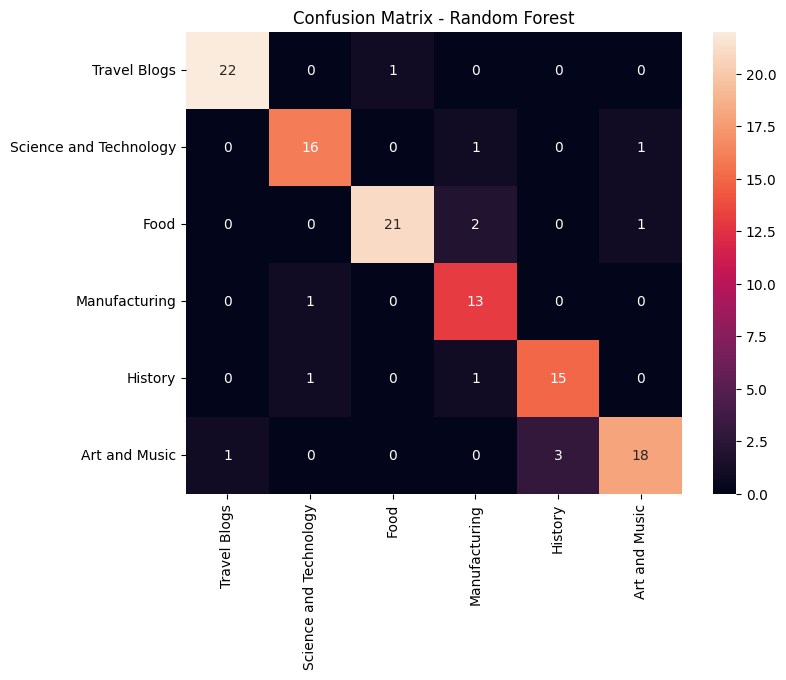

Naive Bayes Precision: 0.85, Recall: 0.81, F1 Score: 0.80


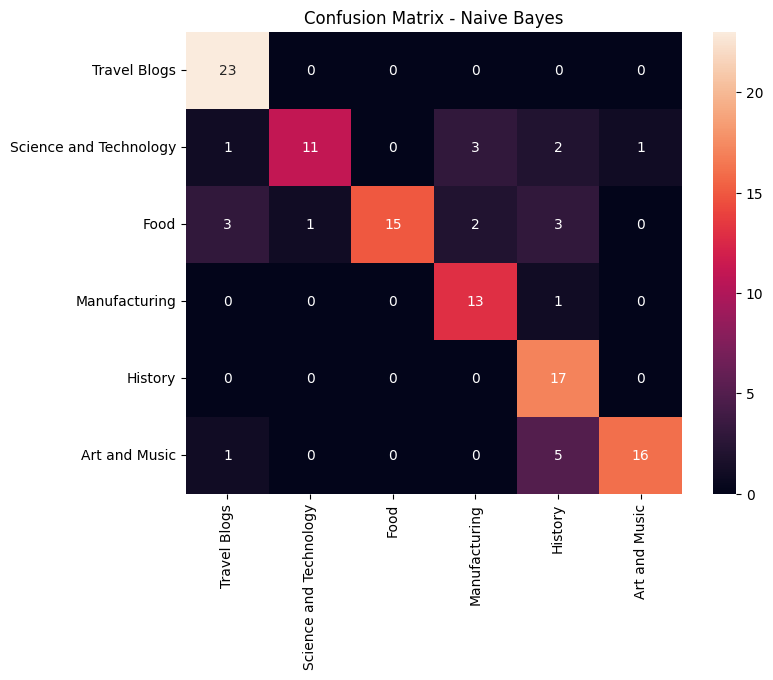

Neural Network Precision: 0.88, Recall: 0.86, F1 Score: 0.86


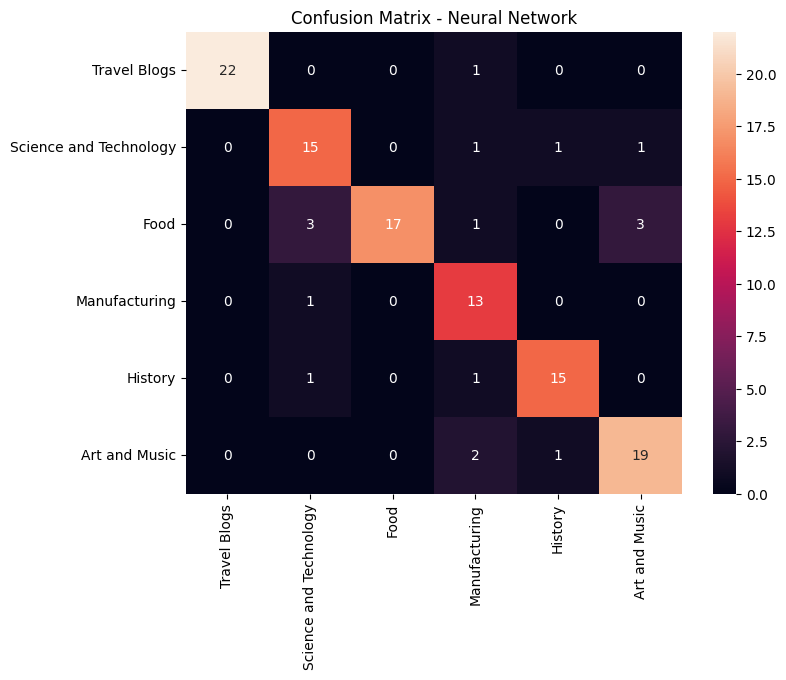

In [5]:
# Evaluation Metrics
models = ['SVM', 'Random Forest', 'Naive Bayes', 'Neural Network']
predictions = [svm_predictions, rf_predictions, nb_predictions, nn_predictions]

# Assuming 'Category' is a column in your DataFrame
categories = data['Category'].unique()

# Display precision, recall, and F1 scores for each model
for i, model in enumerate(models):
    precision = precision_score(test_data['Category'], predictions[i], average='weighted')
    recall = recall_score(test_data['Category'], predictions[i], average='weighted')
    f1 = f1_score(test_data['Category'], predictions[i], average='weighted')

    print(f"{model} Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(test_data['Category'], predictions[i], labels=categories)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories)
    plt.title(f'Confusion Matrix - {model}')
    plt.show()

## Conclusion

The text classification models (SVM, Random Forest, Naive Bayes, Neural Network) have been trained and evaluated using the YouTube dataset. The precision, recall, and F1 scores, along with confusion matrices, provide insights into the performance of each model.